<a href="https://colab.research.google.com/github/Shajad121/mobile-price-range-prediction/blob/main/Capstone_project_mobile_price_range_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
, train_test_split
# import the librearys 
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble  import  BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

In [2]:
# mount colab to the drive
from google.colab import drive 
drive .mount ('/content/drive')



Mounted at /content/drive


In [3]:
# loading the path and file 
df = pd.read_csv('/content/drive/MyDrive/classification project in mobile charn/data_mobile_price_range.csv')

In [4]:
# Dataset First Look
df.head(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1


In [5]:
# Dataset Rows & Columns count
df.shape

(2000, 21)

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
# Dataset Duplicate Value Count
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

WHAT WE UNDERSTAND ABOUT THE DATA

There are 2000 rows and 21 columns in this dataset and in this data set 2 columns are float and rest of 19 columns are int type. there is no missing values and no any duplicated values are persent in this dataset and there is no null values persent in this data.

## ***2. Understanding Variables***

In [9]:
# Dataset Columns
df.head(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1


In [10]:
# Dataset Describe
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
df.head(20)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


### Variables Description 

**Batterry_power**  -->  Battery capacity in mAh.                                                                   
**Blue**   -->  Has bluetooth or not

**Clock_speed**  -->  Speed at which microprocessor exiccute instructins

**Dule_sim**  -->  Has dule sim or not

**Fc**  -->  Front camera megapixels

**Four_g**  -->  Has 4g or not

**Int_memory**  -->  Internal memory  Capacity

**M_deep**  -->  Mobile depth in cm

**Mobile_wt**  -->  weight of mobiles phone

**N_crores**  -->  no of cores in processor

**Pc**  -->  Primary camera pixels

**Px_width**  -->  Pixel resolution width

**Px_hight**  -->  pixel resolution height

**Ram**  -->  Random access memory in MB

**Sc_w**  -->  Screen width

**Talk_time**  -->  Longest that a single batteryy can last over a call

**Three_g**  -->  Has 3g or not

**Wifi**  -->  has wifi or not

**Price_range**  -->  This is the target variables with a value of 0(low cost)1(medium cost)2(high cost)3(very high cost)

In [12]:
# Check Unique Values for each variable.
for i in df:
  print(f'Unique values for {i}: {df[i].unique()}')

Unique values for battery_power: [ 842 1021  563 ... 1139 1467  858]
Unique values for blue: [0 1]
Unique values for clock_speed: [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
Unique values for dual_sim: [0 1]
Unique values for fc: [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
Unique values for four_g: [0 1]
Unique values for int_memory: [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
Unique values for m_dep: [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
Unique values for mobile_wt: [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  

## ***Data Wrangling***

Text(0.5, 1.0, 'Correlation of Attirubtues')

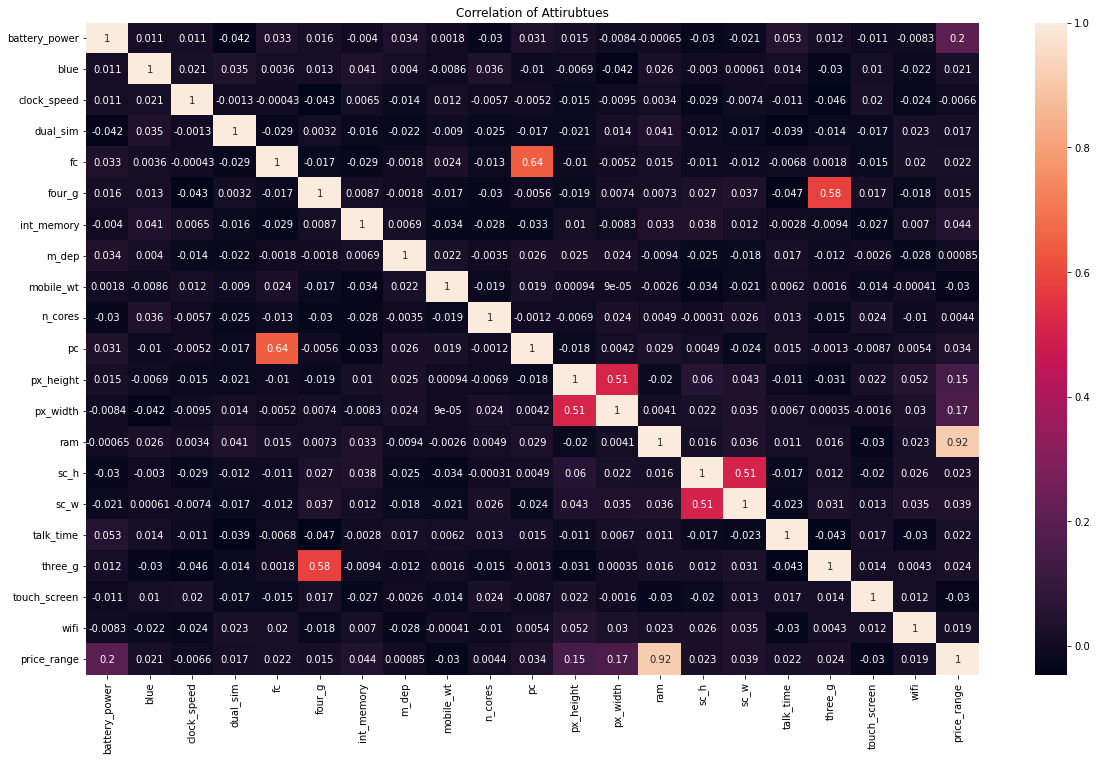

In [13]:
# Compute the correlation matrix
corr = df.corr()
# Set up the matplotlib figure
plt.figure(figsize=(20,12))
# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr,annot = True )
plt.title("Correlation of Attirubtues")

In this emage we clearly show the relation between the variables. According to this grapg we show the 58% relationship between the four_g and the three_g, so we add both columns and make a new columns phone_g and drop the columns four_g and three_g. similarly we multiply the px_width and the px_hight and make new column px_length and then drop the both columns. and similary we creat the new columns screen_size from the sc_w andsc_h and then we remove the sc_w and sc_h.


In [14]:
# we combine the pixcel resolution
df['px_length'] = df['px_height']*df['px_width']

In [15]:
#we drop the columns 
df.drop(['px_height','px_width'], axis = 1, inplace=True)

In [16]:
df['phone_g'] = df['four_g']+df['three_g']

In [17]:
len(df['phone_g'])

2000

In [18]:
# we drop the columns 
df.drop(['four_g', 'three_g'] , axis = 1, inplace=True)

In [19]:
# creat new columns 
df['screen_size'] =df['sc_h']*df['sc_w'] 

In [20]:
# drop the sc_h and sc_w
df.drop(['sc_w','sc_h'], axis = 1, inplace = True)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

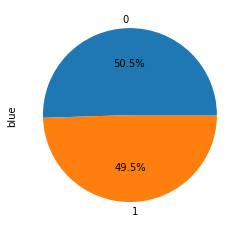

In [21]:
Bluetooth = df['blue'].value_counts()
Bluetooth.plot.pie(autopct='%1.1f%%')


In this pie plot we sow that half of the phone dont have the blutooth there are 50.5% phones have bluetooth and 49.5% phones are bluetooth less

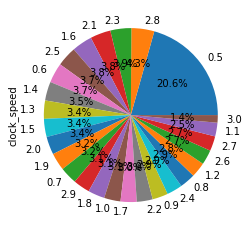

In [22]:
# Chart - 2 visualization code
df['clock_speed'].value_counts().plot.pie(autopct='%1.1f%%')


In this pie chart we shoe the major phones have the 0.5 clock speed , it means that the 0.5 clock speed are mostly used in the phones

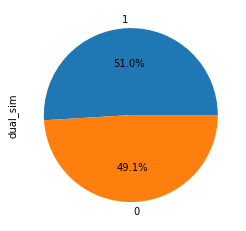

In [23]:
# Chart - 3 visualization code
df['dual_sim'].value_counts().plot.pie(autopct = '%1.1f%%')

accordin to this chart 51% phone have dual sim support and 49% pjones are single sim supportr

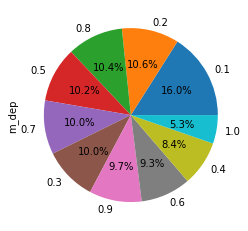

In [24]:
# Chart - 4 visualization code
df['m_dep'].value_counts().plot.pie(autopct = '%1.1f%%')

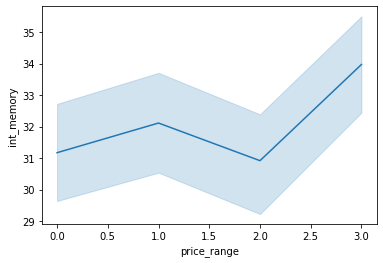

In [25]:
# Chart - 6 visualization code
sns.lineplot(x='price_range',y='int_memory', data = df)

In this chart we can show price range 1 and thre 

In [26]:
df.head(1)

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi,price_range,px_length,phone_g,screen_size
0,842,0,2.2,0,1,7,0.6,188,2,2,2549,19,0,1,1,15120,0,63


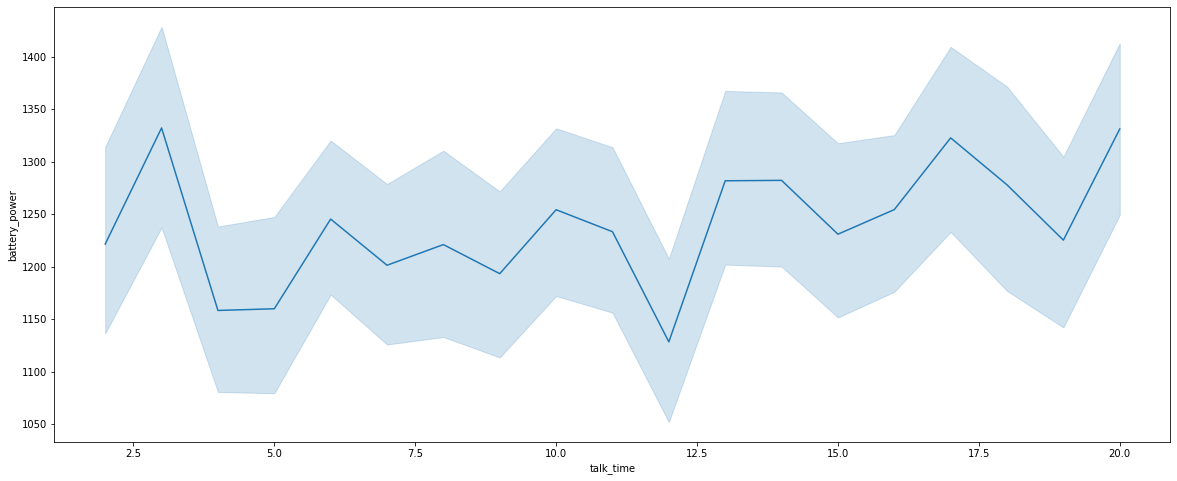

In [27]:
# Chart - 7 visualization code
plt.figure(figsize=(20,8))
sns.lineplot(y='battery_power',x= 'talk_time', data = df)


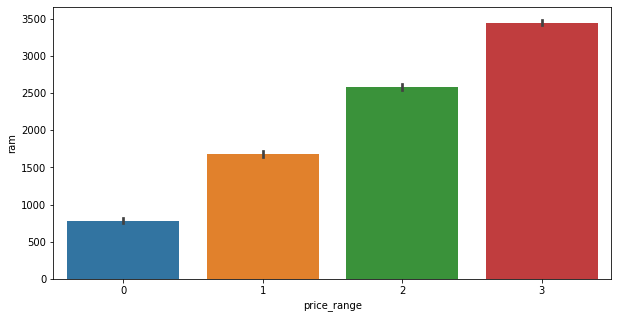

In [28]:
# Chart - 8 visualization code
plt.figure(figsize = (10,5))
sns.barplot(x='price_range',y='ram', data = df)


in this chart we show that price range and ram have lineare corilation ram will increase if we increas the ram

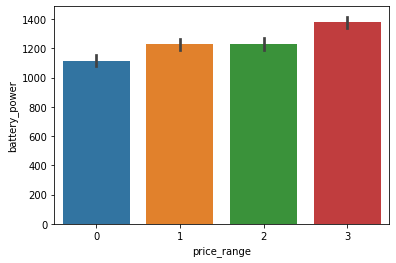

In [29]:
# Chart - 10 visualization code
sns.barplot(x='price_range',y= 'battery_power', data=df)

In this graph we show that battry power increase with the increasing in price range

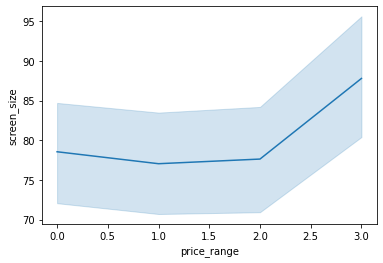

In [30]:
# Chart - 11 visualization code
sns.lineplot( x='price_range', y='screen_size', data = df)

In this line chart we clearly see that the scrfeen size is increase with the price range

## we drow the boxplot for finding the outliers


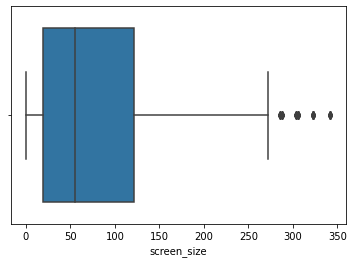

In [31]:
sns.boxplot(x ='screen_size',data=df)

We drow the boxplot to finde the outliers and we found some outlier after the 270 according to this chart

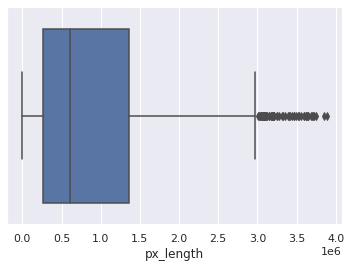

In [32]:
sns.set(rc = {'figure.figsize':(6,4)})
sns.boxplot(x ='px_length',data=df)

In this box plot we see that some outlier are finds after the 3.0 px_length

# **Conclusion**

We performe the some Data warlings with data set and do the graphical persantation with the data set to find out the relationship between the columns or features.

We create and deleate some columns in this data set for make the data more clear and easy to understasnd.

There are half phones have bluetooth and most usable clock speed is 0.5, 20% phone are using the 0.5 clock speed.

Half of the phone are dual sim operator and half of single sim supported. and also we shoe that if we increase the size of battery power it increase the talk time but there are another relation we finde them is if the battery power same in touch and keypad pone, but the talk time of touch is less then the keypad couse of touch screen is bigger and use more battery power.

Ram is increase according to the price range price range 3 have more ram then other and price range 2 have less rem then price rnge 3 and the more ram then price range 1. and so on . and screen size have positive relation with price range. it increasing according to the price range.we found the some outlier also






#**train and test split**

In [33]:
X = df.drop(['price_range'],axis=1)

In [34]:
Y = df.price_range

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=45)

In [36]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1600, 17) (1600,)
(400, 17) (400,)


In [37]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit_transform(X_train)
std.fit_transform(X_test)

array([[ 0.38563864, -0.98511083, -1.29073462, ...,  0.75529293,
         0.85328365, -0.09680789],
       [-0.43246778,  1.01511421,  0.72279954, ..., -0.76660202,
        -1.62000228, -0.59621369],
       [-1.55306733, -0.98511083, -1.29073462, ...,  1.98120634,
        -0.38335932,  1.74715196],
       ...,
       [ 1.24957735,  1.01511421, -1.29073462, ...,  0.80171537,
        -1.62000228,  0.05685543],
       [ 1.72623319, -0.98511083,  0.72279954, ..., -0.75360327,
         0.85328365, -0.63462952],
       [-0.60892211,  1.01511421,  1.31501547, ..., -0.31806556,
        -0.38335932,  0.05685543]])

#**KNN**

In [38]:
from sklearn.neighbors import  KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)


KNeighborsClassifier()

In [39]:

Y_pred = knn.predict(X_test)
Y_pred

array([3, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 2, 0, 3, 3, 1, 3, 0, 2, 1, 0, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 3, 2, 0, 2, 0, 2, 3, 0, 1, 2, 2, 0, 1, 2,
       0, 2, 2, 2, 1, 3, 2, 3, 3, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       3, 2, 2, 1, 3, 2, 3, 0, 0, 2, 1, 3, 0, 2, 2, 3, 1, 2, 2, 2, 2, 3,
       0, 0, 0, 0, 0, 2, 3, 0, 2, 2, 3, 1, 2, 2, 1, 3, 2, 1, 2, 1, 1, 3,
       2, 2, 0, 0, 1, 2, 0, 0, 3, 0, 0, 3, 1, 0, 3, 2, 2, 2, 2, 1, 2, 2,
       0, 0, 1, 1, 1, 0, 0, 3, 2, 3, 1, 0, 2, 0, 3, 0, 3, 1, 2, 0, 1, 1,
       0, 3, 2, 0, 1, 0, 0, 2, 2, 1, 1, 2, 0, 2, 1, 2, 3, 2, 0, 3, 1, 1,
       3, 1, 2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 3, 0, 0, 2, 1, 2, 3, 1, 2, 2,
       0, 3, 1, 0, 3, 1, 0, 0, 3, 2, 3, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 3, 0, 3, 0, 1, 1, 1, 3, 0, 2, 0, 2, 2, 1, 0, 1, 1,
       1, 3, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 1, 0, 0, 2, 2, 2, 1, 0, 0, 2,
       0, 0, 3, 0, 2, 2, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 1, 1, 2, 1, 2, 1,
       0, 0, 0, 3, 0, 1, 3, 1, 1, 2, 1, 0, 0, 1, 2,

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [41]:
MAE = round(mean_absolute_error(Y_test,Y_pred),3)
MSE = round(mean_squared_error(Y_test,Y_pred),3)
r2 = r2_score((Y_test),(Y_pred))
print("MAE :" , MAE)
print("MSE :" , MSE)
print("r2:",r2)

MAE : 0.988
MSE : 1.722
r2: -0.5078648611681029


In [42]:
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.39      0.43      0.41       104
           1       0.38      0.37      0.37       114
           2       0.28      0.30      0.29       105
           3       0.26      0.21      0.23        77

    accuracy                           0.34       400
   macro avg       0.33      0.33      0.33       400
weighted avg       0.33      0.34      0.33       400

[[45 25 24 10]
 [31 42 24 17]
 [32 23 31 19]
 [ 8 20 33 16]]


#**SVM**

In [43]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,Y_train)
     

SVC()

In [44]:
Y_pred = svc.predict(X_test)
Y_pred

array([3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0,
       3, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3,
       0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0,
       3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3,
       0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 3, 3, 0, 0,
       3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3,

In [45]:
MAE = round(mean_absolute_error(Y_test,Y_pred),3)
MSE = round(mean_squared_error(Y_test,Y_pred),3)
r2 = r2_score((Y_test),(Y_pred))
print("MAE :" , MAE)
print("MSE :" , MSE)
print("r2:",r2)

MAE : 1.44
MSE : 3.225
r2: -1.8231432088633568


In [46]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.28      0.72      0.40       104
           1       0.00      0.00      0.00       114
           2       0.00      0.00      0.00       105
           3       0.22      0.38      0.28        77

    accuracy                           0.26       400
   macro avg       0.13      0.27      0.17       400
weighted avg       0.12      0.26      0.16       400



#**Decission tree**#

In [47]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)     


DecisionTreeClassifier()

In [48]:
Y_pred = dtc.predict(X_test)

In [49]:
MAE = round(mean_absolute_error(Y_test,Y_pred),3)
MSE = round(mean_squared_error(Y_test,Y_pred),3)
r2 = r2_score((Y_test),(Y_pred))
print("MAE :" , MAE)
print("MSE :" , MSE)
print("r2:",r2)

MAE : 0.142
MSE : 0.142
r2: 0.8752564628641772


In [50]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       104
           1       0.84      0.81      0.82       114
           2       0.85      0.78      0.82       105
           3       0.87      0.92      0.89        77

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



#**Bagging**

In [51]:
from sklearn.ensemble  import  BaggingClassifier
bg = BaggingClassifier()
bg.fit(X_train,Y_train)     

BaggingClassifier()

In [52]:
Y_Pred = bg.predict(X_test)

In [53]:
MAE = round(mean_absolute_error(Y_test,Y_pred),3)
MSE = round(mean_squared_error(Y_test,Y_pred),3)
r2 = r2_score((Y_test),(Y_pred))
print("MAE :" , MAE)
print("MSE :" , MSE)
print("r2:",r2)

MAE : 0.142
MSE : 0.142
r2: 0.8752564628641772


In [54]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       104
           1       0.84      0.81      0.82       114
           2       0.85      0.78      0.82       105
           3       0.87      0.92      0.89        77

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



#**Random Froest**

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)     

RandomForestClassifier()

In [56]:
Y_pred = rfc.predict(X_test)

In [57]:
MAE = round(mean_absolute_error(Y_test,Y_pred),3)
MSE = round(mean_squared_error(Y_test,Y_pred),3)
r2 = r2_score((Y_test),(Y_pred))
print("MAE :" , MAE)
print("MSE :" , MSE)
print("r2:",r2)

MAE : 0.118
MSE : 0.118
r2: 0.8971412939406374


In [58]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       104
           1       0.85      0.82      0.83       114
           2       0.83      0.83      0.83       105
           3       0.94      0.94      0.94        77

    accuracy                           0.88       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.88      0.88      0.88       400



**Cross validation**

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
#import
from sklearn.model_selection import RandomizedSearchCV

In [90]:
random_forest_grid = {'bootstrap': [True, False],'max_depth': [ 80,90,100,150, None], 'min_samples_leaf': [1, 2, 4,5,7],
                      'min_samples_split': [2,4,6,8,9],'n_estimators': [100, 125, 150,175,200]}


In [91]:
rf_tuned = RandomForestRegressor()


In [92]:
random_forest_cv = RandomizedSearchCV(estimator = rf_tuned, param_distributions = random_forest_grid, n_iter = 10, cv = 3, verbose=2, random_state=42)


In [93]:
#fitting
random_forest_cv.fit(X_train,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=125; total time=   0.8s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=125; total time=   0.9s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=125; total time=   0.8s
[CV] END bootstrap=False, max_depth=90, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=90, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=90, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.7s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100; tota

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [80, 90, 100, 150, None],
                                        'min_samples_leaf': [1, 2, 4, 5, 7],
                                        'min_samples_split': [2, 4, 6, 8, 9],
                                        'n_estimators': [100, 125, 150, 175,
                                                         200]},
                   random_state=42, verbose=2)

In [94]:
#best para
random_forest_cv.best_params_

{'n_estimators': 125,
 'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_depth': 150,
 'bootstrap': True}

In [95]:
new_random_forest = random_forest_cv.best_params_


In [96]:
# fitting 
New_random_forest = RandomForestRegressor(n_estimators=100,random_state=42,bootstrap=True,max_depth=80,min_samples_leaf=2,min_samples_split=6)
New_random_forest.fit(X_train,Y_train)

RandomForestRegressor(max_depth=80, min_samples_leaf=2, min_samples_split=6,
                      random_state=42)

In [97]:
Mae = round(mean_absolute_error(Y_test,Y_pred),3)
Mse = round(mean_squared_error(Y_test,Y_pred),3)
R_2 = r2_score((Y_test),(Y_pred))
print("Mae :" , Mae)
print("Mse :" , Mse)
print("R_2:",R_2)

Mae : 0.092
Mse : 0.092
R_2: 0.9190261250170976


In [98]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       104
           1       0.87      0.87      0.87       114
           2       0.89      0.89      0.89       105
           3       0.96      0.95      0.95        77

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



#**Gradient boosting**

In [59]:

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,Y_train)

GradientBoostingClassifier()

In [60]:
Y_pred = gb.predict(X_test)

In [61]:
MAE = round(mean_absolute_error(Y_test,Y_pred),3)
MSE = round(mean_squared_error(Y_test,Y_pred),3)
r2 = r2_score((Y_test),(Y_pred))
print("MAE :" , MAE)
print("MSE :" , MSE)
print("r2:",r2)

MAE : 0.09
MSE : 0.09
r2: 0.9212146081247435


In [62]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       104
           1       0.88      0.86      0.87       114
           2       0.89      0.88      0.88       105
           3       0.94      0.97      0.96        77

    accuracy                           0.91       400
   macro avg       0.91      0.92      0.91       400
weighted avg       0.91      0.91      0.91       400



**cross validation**

#**XG Boost**

In [63]:
import xgboost
from xgboost import XGBClassifier
xgc = XGBClassifier()


In [64]:
xgc.fit(X_train,Y_train)

XGBClassifier(objective='multi:softprob')

In [65]:
Y_pred = xgc.predict(X_test)

In [66]:
MAE = round(mean_absolute_error(Y_test,Y_pred),3)
MSE = round(mean_squared_error(Y_test,Y_pred),3)
r2 = r2_score((Y_test),(Y_pred))
print("MAE :" , MAE)
print("MSE :" , MSE)
print("r2:",r2)

MAE : 0.092
MSE : 0.092
r2: 0.9190261250170976


In [67]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       104
           1       0.87      0.87      0.87       114
           2       0.89      0.89      0.89       105
           3       0.96      0.95      0.95        77

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



**cross validation**

In [68]:
# define parameters
xgboost_params = {'learning_rate': [0.05,0.1,0.3],
                'max_depth': [3,5,7,9],
                'min_child_weight' : [3,5,7,9],
                'max_delta_step' : [3,5,7],
                'sampling_method' : ['uniform','gradient_based']}

In [69]:
xgbc = XGBClassifier(use_lable_encoder = False,eval_metric = 'merror')

In [70]:
#gread search
grid_search = GridSearchCV(
    estimator = xgbc,
    param_grid = xgboost_params,
    n_jobs= 1,cv = 3,
    scoring ='accuracy',
    error_score = 0 )
grid_result = grid_search.fit(X_train,Y_train)

In [71]:
# final model
final_model = xgc.set_params(**grid_search.best_params_)   

In [72]:
final_model.fit(X_train,Y_train)

XGBClassifier(learning_rate=0.3, max_delta_step=3, max_depth=5,
              min_child_weight=3, objective='multi:softprob',
              sampling_method='uniform')

In [73]:
Y_presd = final_model.predict(X_test)

In [74]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       104
           1       0.87      0.87      0.87       114
           2       0.89      0.89      0.89       105
           3       0.96      0.95      0.95        77

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400

